In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df = pd.read_csv('../../../../data/core-web-vitals/testrun-8/results-csr-throttled-heavy.csv', sep=',')

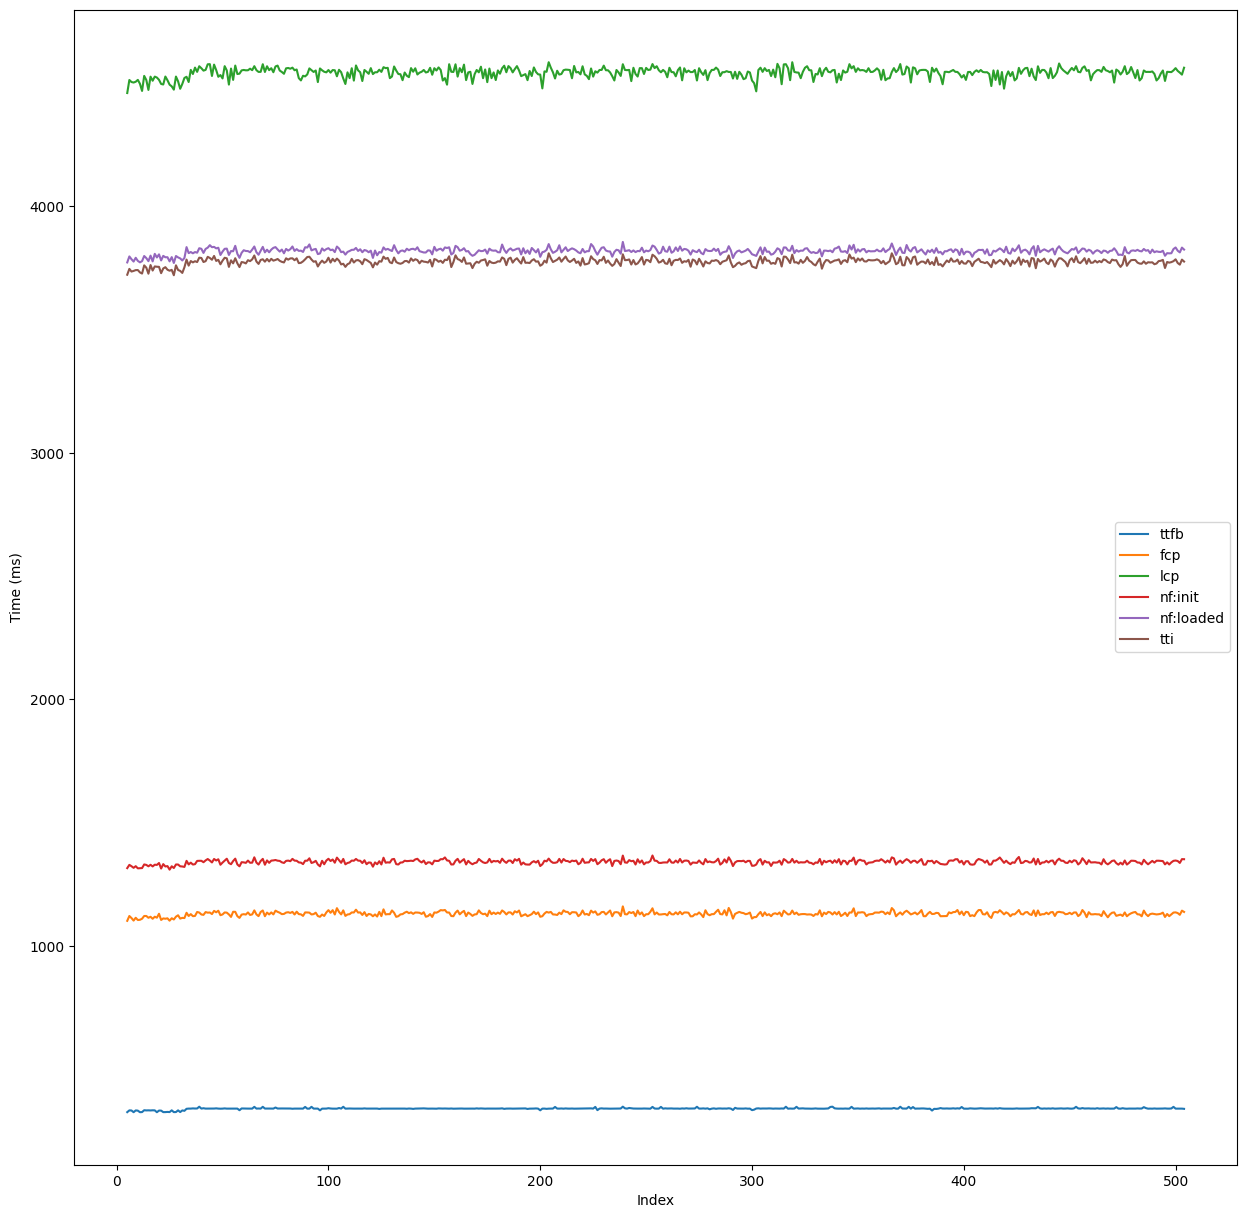

In [2]:

features = ['navTime', 'totalTime', 'lcp', 'fcp', 'ttfb', 'tbt', 'tti', 'longestTask', 'longTasks', 'nf:init', 'nf:config','nf:loaded']
target_features = ['ttfb', 'fcp', 'lcp',  'nf:init', 'nf:loaded', 'tti'] #

# Remove Java warmup
df = df.iloc[5:]

# Plotting the line graph for ttfb, fcp, and tti
plt.figure(figsize=(15, 15))
for t in target_features:
    plt.plot(df[t], label=t)

plt.xlabel('Index')
plt.ylabel('Time (ms)')
plt.legend()
plt.show()

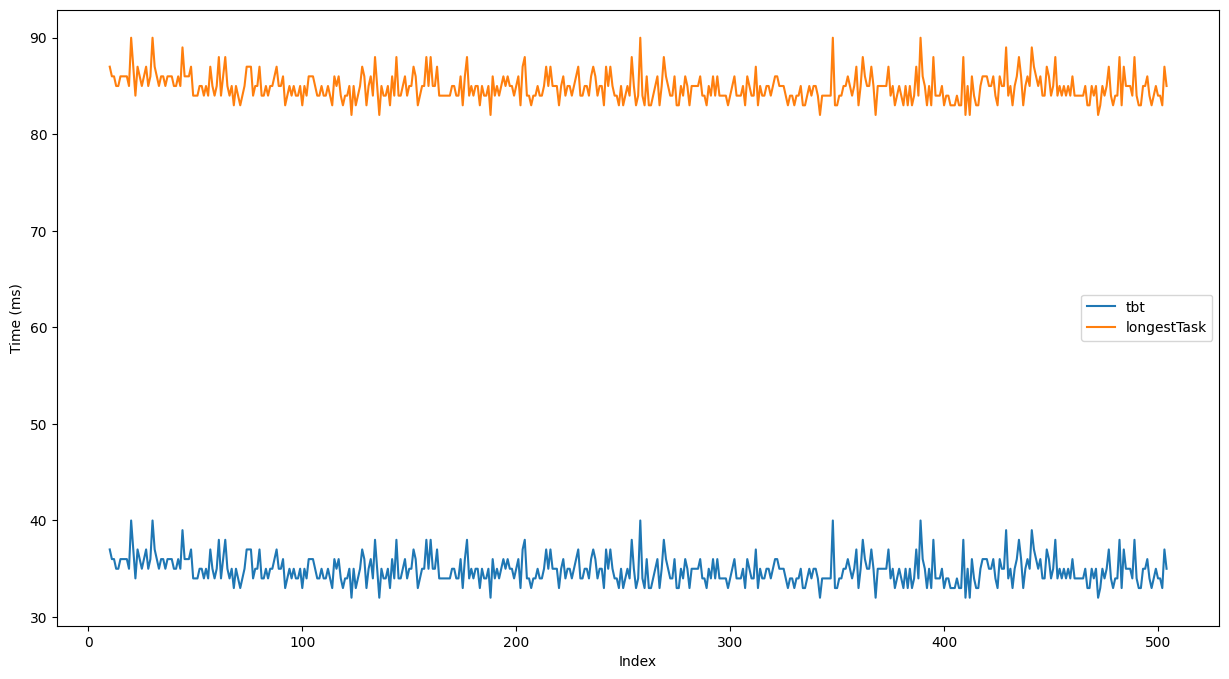

In [3]:

target_features = ['tbt', 'longestTask'] #

# Remove Java warmup
df = df.iloc[5:]

# Plotting the line graph for ttfb, fcp, and tti
plt.figure(figsize=(15, 8))
for t in target_features:
    plt.plot(df[t], label=t)

plt.xlabel('Index')
plt.ylabel('Time (ms)')
plt.legend()
plt.show()

In [4]:
features = ['navTime', 'totalTime', 'lcp', 'fcp', 'ttfb', 'tbt', 'tti', 'longestTask', 'longTasks', 'nf:init', 'nf:config','nf:loaded']
headers = ["feature","Tests", "min", "1st Qrt.", "mean", "median", "3rd Qrt.", "max", "std dev."] 
report = []

for f in features:
  report.append([
      f,
      df[f].size,
      df[f].min(),
      df[f].quantile(0.25),
      df[f].mean(),
      df[f].median(),
      df[f].quantile(0.75),
      df[f].max(),
      df[f].std(),
  ])

pd.DataFrame(report, columns=headers)

,feature,Tests,min,1st Qrt.,mean,median,3rd Qrt.,max,std dev.
0,navTime,495,320.00,335.00,335.58,336.00,337.00,344.00,3.40
1,totalTime,495,3740.00,3790.00,3807.02,3808.00,3824.00,3856.00,20.46
2,lcp,495,4466.80,4531.40,4542.41,4545.80,4553.90,4585.00,20.59
3,fcp,495,1102.30,1127.20,1130.61,1129.40,1135.90,1160.30,8.52
4,ttfb,495,325.20,339.70,339.84,339.90,340.30,347.80,3.03
5,tbt,495,32.00,34.00,34.86,35.00,36.00,40.00,1.41
6,tti,495,3720.80,3768.90,3775.59,3776.50,3783.25,3809.80,12.99
7,longestTask,495,82.00,84.00,84.86,85.00,86.00,90.00,1.41
8,longTasks,495,1.00,1.00,1.00,1.00,1.00,1.00,0.00
9,nf:init,495,1309.40,1336.60,1340.72,1339.30,1345.80,1366.70,8.55
